### 오케라스트라 (캐글뽀개기X케라스코리아) 파트1 주말반
#### 캐글뽀개기, 이상열
#### (keras) 1. 케라스 시작하기

#### 커뮤니티 
- 캐글뽀개기 : https://www.facebook.com/groups/kagglebreak/
- 케라스 코리아 : https://www.facebook.com/groups/KerasKorea/

![img](./img/image.jpg)

- Reference : 저자 블로그 https://tykimos.github.io/lecture/

### 1. 케라스 시작하기

#### 1.1 케라스의 주요 특징
1. 모듈화 (모듈 독립적, 가능한 최소한의 제약사항, 시퀀스 또는 그래프로 모듈들 구성)
2. 최소주의 (각 모듈은 짧고 간결성)
3. 쉬운 확장성 (새로운 클래스나 함수로 모듈을 쉽게 추가할 수 있음)
4. 파이썬 기반

#### 1.2 케라스 기본 개념
- 가장 핵심적인 데이터 구조 = 모델, 시퀀스 모델로 원하는 레이어 순차적으로 쌓을 수 있음

1. 데이터셋 생성하기 
    - 원본 데이터 불러오거나 시뮬레이션 통해 데이터 생성
    - 데이터로부터 훈련셋, 검증셋, 시험셋 생성
2. 모델 구성하기
    - 시퀀스 모델 생성 뒤 필요한 레이어 추가 구성
    - 복잡한 모델이 필요할 때는 케라스 함수 API 사용
3. 모델 학습과정 설정하기
    - 학습하기 전에 학습에 대한 설정을 수행
    - 손실 함수 및 최적화 방법 정의
    - 케라스에서는 complie() 함수를 사용
4. 모델 학습시키기
    - 훈련셋을 이용하여 구성한 모델 학습
5. 학습과정 살펴보기
    - 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도 측정
6. 모델 평가하기
    - 준비된 시험셋으로 학습한 모델 평가
7. 모델 사용하기
    - 임의의 입력으로 모델의 출력을 얻음
    
#### 1.3 손글씨 영상 분류 모델 구현 
- 28 X 28 이미지 입력 받아 784 벡터로 구성한 휘 학습 및 평가하는 코드

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [3]:
import numpy as np

In [4]:
np.shape(x_train)

(60000, 784)

In [5]:
np.shape(x_test)

(10000, 784)

In [6]:
np.shape(y_train)

(60000, 10)

In [24]:
np.shape(y_test)

(10000, 10)

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 6s - loss: 0.6996 - acc: 0.8219       

In [10]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.69961685290336606, 0.34822005708217618, 0.30230814073880513, 0.27497676758567491, 0.2529709918518861]
[0.82186666666666663, 0.90343333333333331, 0.91523333333333334, 0.92210000000000003, 0.92820000000000003]


In [11]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

 9600/10000 [===========================>..] - ETA: 0s## evaluation loss and_metrics ##
[0.2373430255293846, 0.9335]


In [12]:
# 7. 모델 사용하기
xhat = x_test[0:1]
#print(xhat)
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[  1.64349258e-04   2.44926014e-07   3.21341387e-04   2.89425394e-03
    4.00440558e-06   3.25086621e-05   4.28650289e-08   9.95820642e-01
    6.25045213e-05   7.00146658e-04]]


In [13]:
model

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

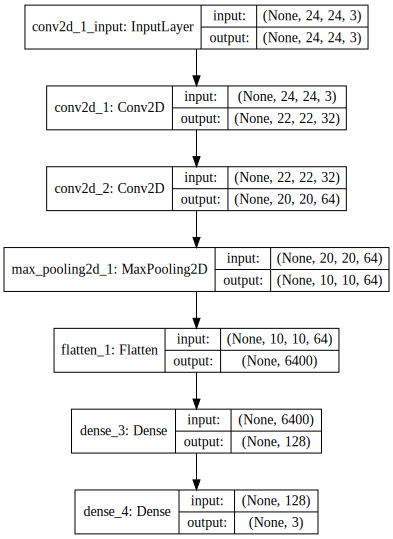

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s - loss: 0.8704 - acc: 0.5111 - val_loss: 0.4096 - val_acc: 0.8667
Epoch 2/50
15/15 [==============================] - 0s - loss: 0.1187 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 1.0000

In [21]:
from keras.models import Model

In [29]:
model

In [41]:
intermediate_layer_model_4 = Model(input=model.input,output=model.layers[4].output)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("co...)`
  if __name__ == '__main__':


In [42]:
intermediate_layer_model_4

In [43]:
print(intermediate_layer_model_4.predict_generator(train_generator, steps=5))

[[ 0.          0.          2.00106883 ...,  0.          2.29936314  0.        ]
 [ 0.          0.          2.71987462 ...,  0.          2.6588192   0.        ]
 [ 0.          0.          0.07560644 ...,  0.          0.14055622  0.        ]
 ..., 
 [ 0.          0.          1.67243981 ...,  0.          2.05030489  0.        ]
 [ 0.          0.          0.13093705 ...,  0.          0.          0.        ]
 [ 0.          0.          1.97260869 ...,  0.          2.81713176  0.        ]]


In [ ]:
intermediate_layer_model = Model(input=model.input,output=model.layers[0].output)

[keras model api 설명](https://keras.io/models/model)
<br>
[keras gitbook](https://ustczen.gitbooks.io/keras/content/)

### Keras Gitbook Examples
- https://faroit.github.io/keras-docs/0.3.0/examples/

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

In [17]:
model = Sequential()

In [18]:
model.add(Dense(20, input_dim=64, init='uniform'))
model.add(Activation('tanh'))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=64, kernel_initializer="uniform")`
  if __name__ == '__main__':


In [21]:
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=64, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=2, init='uniform'))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=64, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=2, kernel_initializer="uniform")`


In [22]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [23]:
model = Sequential()
model.add(Dense(20, input_dim=64, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=64, init='uniform', activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, input_dim=2, init='uniform', activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="tanh", input_dim=64, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="tanh", input_dim=64, kernel_initializer="uniform")`
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="softmax", input_dim=2, kernel_initializer="uniform")`
